# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Scoping an analytics project

## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Thuy Hong Doan
    - Email: td688@drexel.edu
- Group member 
    - Name: Alsulami Meznah
    - Email: mha54@drexel.edu

## Team members background:

What areas/skills/domains does the team member presently identify with?
Into which areas/skills/domains would the team member like to grow?

- __Amira Bendjama__: is an Algerian Fulbrighter with a bachelor’s in computer science, and a master’s in networks and distributed systems. Her skill set varies from different programming languages, to problem solving and critical thinking. She worked with Youtube API V3 to retrieve dataset for [Valorant comments on Youtube](https://github.com/amira-bendjama/VALORANT-COMMENTS). 

- __Alsulami Meznah__: is a graduate student in Data Science. She majored in bachelor's degree was in Information Systems.  She has a good background on Java, Visual Basic, SQL. She looks forward to improving my skills and learning more about Python and R.

- __Thuy Hong Doan__: graduated with a bachelor of business administration in Computer Information Systems. Her skill set varies from different programming languages, to analytical and problem solving skills. She worked with HTML, CSS, SQL, JavaScript, and Python. She plans to use her previous coding experience and understanding of data structure to help successfully complete this project.

### Growth area 

We are looking to take on a project that presents real world data analysis challenges in order to align our skills with the type of work we would undertake in the professional world. Analyzing dataset is particularly challenging because of different steps we need to take before actualy analysis the dataset such cleaning the dataset, checking the correcteness, and thus is a good way to learn about data analysis.

## Topic summary 

YouTube is one of the leading video sharing and social media platform in the world. Thus, It had a huge impact on changing the marketing startegies by video promotion or sponsoring independent Youtubers, with its captivating features such as the recommendation page, and trending page. However, the later doesn’t have a clear indication of what makes a Youtube video trending. Hence, the speculation on what makes a video trending such as [Researching The Trending Tab (BTS)](https://www.youtube.com/watch?v=sEvtpj-uChA&ab_channel=Coffeezilla), [What Is YouTube Trending And How It Works](https://www.notion.so/project-scooping-427deb3f9cbc4c32949c17248bdc0a30#04a09cb6fee248398f38d2fa43a72052). The goal of the project is to perform EDA analysis on the dataset to find the patterns among trending videos and develop a classification model to attribute the factor that affects how popular a Youtube video will be. Those insights might be used by Youtube channels owned by tradational companies that seek to break into the new marketing field, or they can be used by individual Youtubers that seek to increase the popularity of their videos, without effecting their content creation. This project will relay on [dataset](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset) from Kaggle which was collected using the Youtube API.



## Term Project Phase 1: details 

__What is our dataset?__

Dataset is collected using Youtube API, for different regions. However, the project will focus on United states' dataset. The data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count, category.

__What is the availability of relevant pre-processed data?__

The dataset is available for the public in [Kaggle](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset). 

__What will the analysis to do, who/what it will support?__ 

The EDA analysis on the dataset to find the patterns among trending videos and develop a classification model to find the factors. The questions we are trying to solve are: 
1. what are top most trending Categories? 
2. what is the impact of Likes,Dislikes and Comments.
3. what is the most used words for titles, video description, tags?

__Who would be interested in the data analysis?__
- Adverstiser to sponsor Youtube videos that have the potenial to be trending
- Youtube channels owned by companies that want to keep up with the trends for better preforming product ads. 
- Independent Youtubers who wants to make trending videos
- Researchers to derive insight about behavior from Youtube trends and marketing startegies 

__Limitations__

- The dataset is limited to several months and only 200 videos per day, and hence it could add some bias on the predictions. 
- World events that are relevent to only several months can effect the prediction greatly in a small dataset.
- Absence of duration column in dataset, which is considered one of the factors to impact the trending videos.

__Potential solutions__ 
- The results can be improved by extending the data collection to few years back, 
- Improving  the predection to ignore the irrelevent events. 
- Adding the duration column to the dataset


__How the analysis might fit into an application or investigation?__ 


__Selection data for continued analysis, including justification:__ 


__How our analysis might be completed and disseminated?__

The duration of the project won't allow to compare different classification models, 



### Potential Software used 
- Juypter notebook 

### Hardware used 
- Acer processor i5 RAM 8GB
- Hp processor i7 RAM 8GB
- Macbook Pro processor i5 RAM 8GB



# Exploratory Data Analysis 

Loading the data from the csv file and into dataframe and to retrieve the categories for a specific video, we must load a json file since this is how the dataset was structured.

In [6]:
!pip install matplotlib

In [7]:
!pip install seaborn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

US_category_id = pd.read_json('data/US_category_id.json')
trending_youtube = pd.read_csv('data/US_youtube_trending_data.csv')




Number of elements in the dataset

In [9]:
US_category_id.shape , trending_youtube.shape

((32, 3), (180390, 16))

Columns in the dataset

In [10]:
trending_youtube.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

Some of the columns are redundant for our analysis so we will drop them

In [11]:
trending_youtube.drop(['video_id','thumbnail_link', 'description'], axis=1, inplace=True)

In [12]:
trending_youtube.shape

(180390, 13)

In [13]:
trending_youtube.dtypes

title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
dtype: object

Trending date and publishedAt columns have object data type which needs to changed as datetime

In [14]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11T19:20:14Z,2020-08-12T00:00:00Z
1,2020-08-11T17:00:10Z,2020-08-12T00:00:00Z
2,2020-08-11T16:34:06Z,2020-08-12T00:00:00Z
3,2020-08-11T16:38:55Z,2020-08-12T00:00:00Z
4,2020-08-11T15:10:05Z,2020-08-12T00:00:00Z


For the trending date column, we need some reformatting. 

In [15]:
trending_youtube['trending_date'] = pd.to_datetime(trending_youtube['trending_date'], format = "%Y-%m-%dT%H:%M:%SZ")

The publishedAt column converted with the astype function

In [16]:
trending_youtube['publishedAt'] = trending_youtube['publishedAt'].astype('datetime64[ns]')

In [17]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14,2020-08-12
1,2020-08-11 17:00:10,2020-08-12
2,2020-08-11 16:34:06,2020-08-12
3,2020-08-11 16:38:55,2020-08-12
4,2020-08-11 15:10:05,2020-08-12


In [18]:
trending_youtube[['trending_date','publishedAt']].dtypes


trending_date    datetime64[ns]
publishedAt      datetime64[ns]
dtype: object

The difference between the time a video is published and its trending time might be a useful piece of information for the analysis. Since both columns have datetime data type, we can easily calculate the time difference.

In [19]:
trending_youtube['time_diff'] = trending_youtube['trending_date'] - trending_youtube['publishedAt']
trending_youtube['time_diff'].head()

0   0 days 04:39:46
1   0 days 06:59:50
2   0 days 07:25:54
3   0 days 07:21:05
4   0 days 08:49:55
Name: time_diff, dtype: timedelta64[ns]

Most of the videos uploaded by different channels

In [20]:
trending_youtube.channelTitle.nunique()

7057

The data type of the time_diff column is timedelta. We need to convert it to a numerical variable to plot its distribution

In [21]:
trending_youtube['time_diff_hour'] = trending_youtube['time_diff'] / pd.Timedelta('1 hour')
trending_youtube['time_diff_hour'].mean()

81.59874107643314

In [22]:
trending_youtube['time_diff_hour'].mean() / 24

3.399947544851381

When we take the mean and divide by 24, we get the same value as the mean of the time_diff column.
One type of visualization that gives us an overview of the distribution is the box plot.

<AxesSubplot: ylabel='time_diff_hour'>

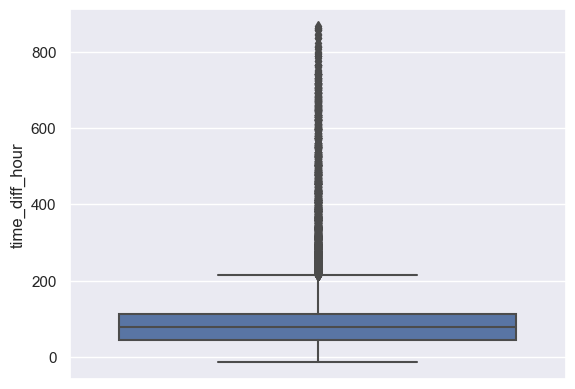

In [23]:
sns.boxplot(data=trending_youtube, y='time_diff_hour')


Eliminate the outliers

In [24]:
len(trending_youtube)

180390

In [25]:
len(trending_youtube[trending_youtube.time_diff_hour > 600])


193

In [26]:
len(trending_youtube[trending_youtube.time_diff_hour <= 600])


180197

The displot function of Seaborn to create a histogram as below.

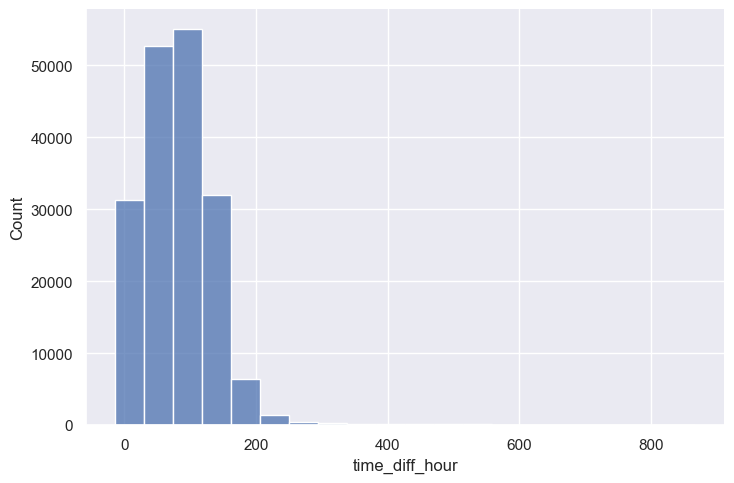

In [27]:
sns.displot(data=trending_youtube, x='time_diff_hour', kind='hist',aspect=1.5, bins=20)

compare the average views of trending videos published by these channels

In [28]:
trending_youtube['views_mil'] = trending_youtube['view_count'] / 1000000
trending_youtube[['channelId','views_mil']].groupby('channelId')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10]

views_mil      
                               mean count
channelId                                
UCDVYQ4Zhbm3S2dlz7P1GBDg   3.821924  1222
UCWJ2lWNubArHWmf3FIHbfcQ   2.191121  1067
UCpB959t8iPrxQWj7G6n0ctQ   4.805159   595
UCqZQlzSHbVJrwrn5XvzrzcA   1.232200   541
UCIPPMRA040LQr5QPyJEbmXA  10.070149   512
UCke6I9N4KfC968-yRcd5YRg   3.817033   491
UCRijo3ddMTht_IHyNSNXpNQ   7.365383   488
UCET00YnetHT7tOpu12v8jxg   1.122511   488
UCqFzWxSCi39LnW1JKFR3efg   3.252661   483
UCX6OQ3DkcsbYNE6H8uQQuVA  30.323988   474

The number of trending videos changes over time

In [29]:
daily = trending_youtube[['trending_date']].value_counts().reset_index()\
.sort_values(by='trending_date').reset_index(drop=True)

In [30]:
daily.head()

,trending_date,0
0,2020-08-12,200
1,2020-08-13,200
2,2020-08-14,200
3,2020-08-15,200
4,2020-08-16,200


Generate a line plot based on the daily dataframe.

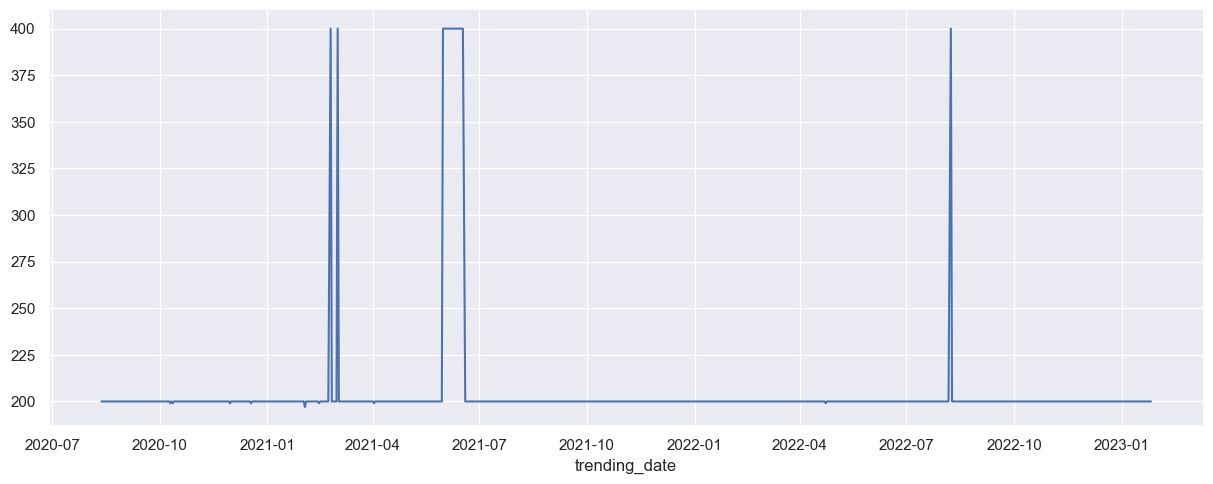

In [31]:
sns.relplot(data=daily, x='trending_date', y=0,
kind='line', aspect=2.5)

In [32]:
#Hong

In [33]:
#creating dictionary for json file provided for category and category id
category_dict = {}
for i in US_category_id['items']:
    category_dict[i['id']] = i['snippet']['title']

In [34]:
#replacing the category id with category actual name 
def replace_categoryid(df):
    if str(df) in category_dict:
        return category_dict[str(df)]
    
trending_youtube['category'] = trending_youtube['categoryId'].apply(replace_categoryid)


In [35]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180390 entries, 0 to 180389
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   title              180390 non-null  object         
 1   publishedAt        180390 non-null  datetime64[ns] 
 2   channelId          180390 non-null  object         
 3   channelTitle       180390 non-null  object         
 4   categoryId         180390 non-null  int64          
 5   trending_date      180390 non-null  datetime64[ns] 
 6   tags               180390 non-null  object         
 7   view_count         180390 non-null  int64          
 8   likes              180390 non-null  int64          
 9   dislikes           180390 non-null  int64          
 10  comment_count      180390 non-null  int64          
 11  comments_disabled  180390 non-null  bool           
 12  ratings_disabled   180390 non-null  bool           
 13  time_diff          180390 non

In [41]:
#Groupby category
category_group = trending_youtube.groupby(by = trending_youtube['category']).sum()
category_group


C:\Users\mira\AppData\Local\Temp\ipykernel_5080\4093669795.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_group = trending_youtube.groupby(by = trending_youtube['category']).sum()


,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,time_diff_hour,views_mil
category,,,,,,,,,
Autos & Vehicles,6606,3203093015,146328549,1408858,12269306,6,11,2.469770e+05,3203.093015
Comedy,221099,16846787128,1160920755,11174623,57672635,9,15,7.868969e+05,16846.787128
Education,117909,7860308353,437383254,4040488,25287441,40,30,3.439149e+05,7860.308353
Entertainment,868512,111485797504,5473099612,62549431,333751870,500,132,3.047833e+06,111485.797504
Film & Animation,7165,16648573530,726106705,6686643,51362729,91,83,5.764911e+05,16648.573530
Gaming,702540,62850477795,3422629644,38395646,260768558,323,220,2.686034e+06,62850.477795
Howto & Style,131352,6443826304,332200139,7266989,24954470,47,25,3.981859e+05,6443.826304
Music,295210,130640325016,8609591063,106002834,961391431,73,107,2.506194e+06,130640.325016
News & Politics,174750,15670539220,202028974,9979392,44950529,746,79,6.869117e+05,15670.539220


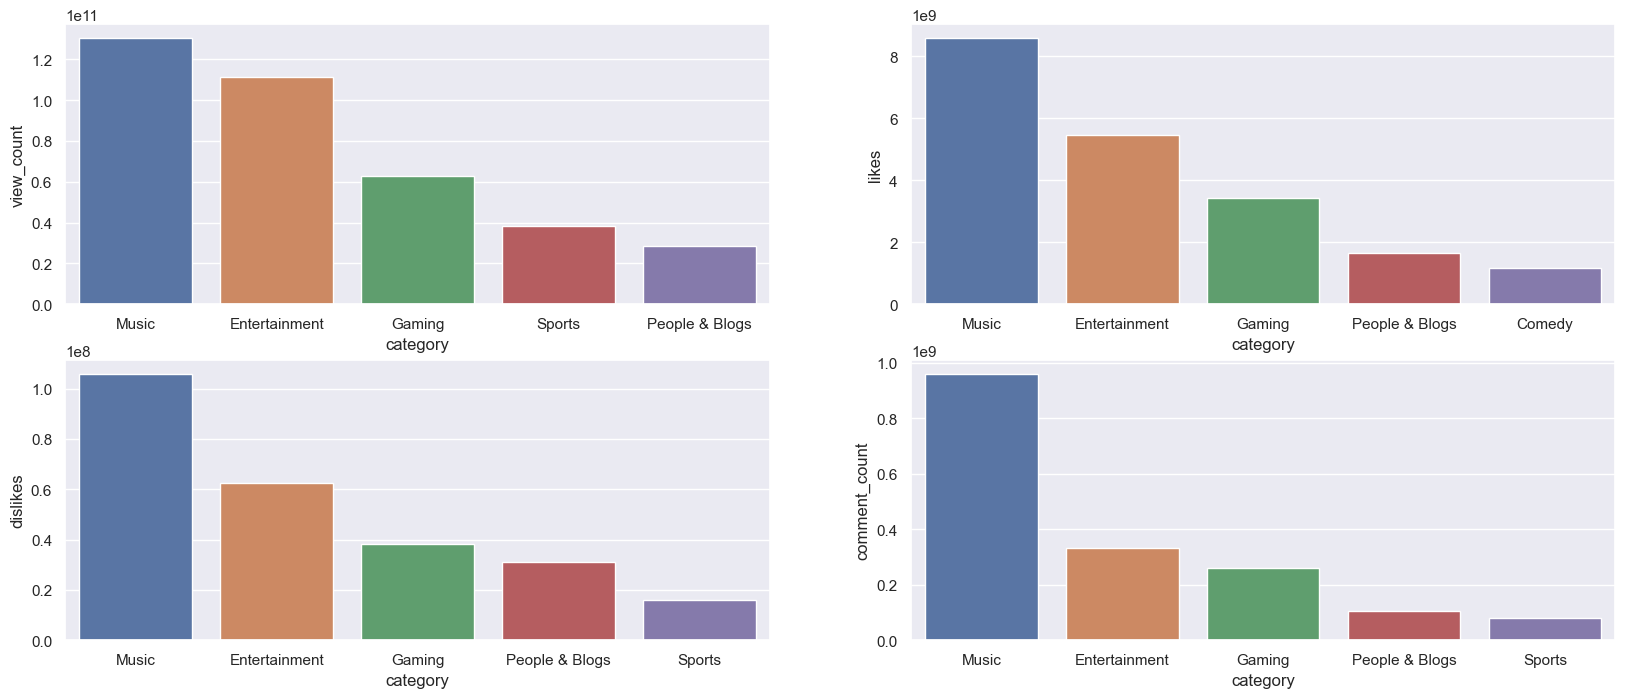

In [37]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group[list[i]].nlargest(5).index
    y = category_group[list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

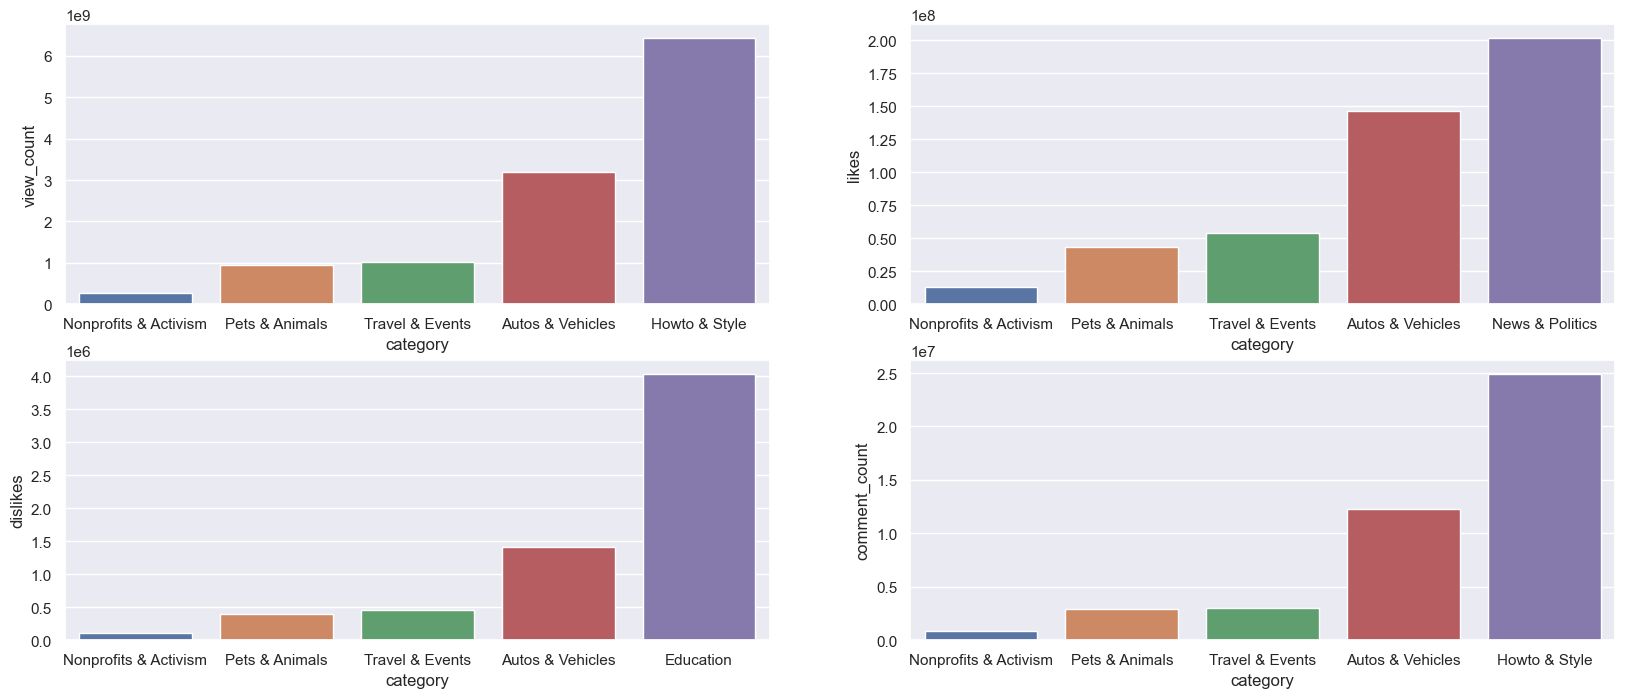

In [38]:
#Plotting the 5 Categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group[list[i]].nsmallest(5).index
    y = category_group[list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)
